In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Doc du lieu B2
df = pd.read_csv('Data_Comp_Train.csv')
dataset_train = df.copy()

In [ ]:
training_set = dataset_train['SL_Filter'].values
training_set

array([-1166162.652  , -2091554.652  ,  -654079.6522 ,  -115220.6522 ,
        2944109.348  ,  -686359.6522 ,  3654147.348  ,  5732146.348  ,
        -263030.6522 ,  -829063.6522 ,   529673.3478 ,   997177.3478 ,
       -1400250.652  , -2394884.652  ,  -656309.6522 ,  -239120.6522 ,
        1857501.348  ,   -44784.65217, -1578528.652  , -1022373.652  ,
       -1939883.652  , -1015606.652  ,   382459.3478 ])

In [ ]:
training_set= training_set.reshape(-1,1)
training_set

array([[-1166162.652  ],
       [-2091554.652  ],
       [ -654079.6522 ],
       [ -115220.6522 ],
       [ 2944109.348  ],
       [ -686359.6522 ],
       [ 3654147.348  ],
       [ 5732146.348  ],
       [ -263030.6522 ],
       [ -829063.6522 ],
       [  529673.3478 ],
       [  997177.3478 ],
       [-1400250.652  ],
       [-2394884.652  ],
       [ -656309.6522 ],
       [ -239120.6522 ],
       [ 1857501.348  ],
       [  -44784.65217],
       [-1578528.652  ],
       [-1022373.652  ],
       [-1939883.652  ],
       [-1015606.652  ],
       [  382459.3478 ]])

In [ ]:
# Thuc hien scale du lieu gia ve khoang 0,1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.15118953],
       [0.03732359],
       [0.21419938],
       [0.28050391],
       [0.65694274],
       [0.21022745],
       [0.74431019],
       [1.        ],
       [0.26231646],
       [0.19266827],
       [0.35985565],
       [0.41738022],
       [0.1223859 ],
       [0.        ],
       [0.21392499],
       [0.26525849],
       [0.52323979],
       [0.28917079],
       [0.10044948],
       [0.16888222],
       [0.05598613],
       [0.16971487],
       [0.34174153]])

In [ ]:
# Tao du lieu train, X = 8 time steps, Y =  1 time step
X_train = []
y_train = []
no_of_sample = len(training_set)

for i in range(8, no_of_sample):
    X_train.append(training_set_scaled[i-8:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.15118953],
        [0.03732359],
        [0.21419938],
        [0.28050391],
        [0.65694274],
        [0.21022745],
        [0.74431019],
        [1.        ]],

       [[0.03732359],
        [0.21419938],
        [0.28050391],
        [0.65694274],
        [0.21022745],
        [0.74431019],
        [1.        ],
        [0.26231646]],

       [[0.21419938],
        [0.28050391],
        [0.65694274],
        [0.21022745],
        [0.74431019],
        [1.        ],
        [0.26231646],
        [0.19266827]],

       [[0.28050391],
        [0.65694274],
        [0.21022745],
        [0.74431019],
        [1.        ],
        [0.26231646],
        [0.19266827],
        [0.35985565]],

       [[0.65694274],
        [0.21022745],
        [0.74431019],
        [1.        ],
        [0.26231646],
        [0.19266827],
        [0.35985565],
        [0.41738022]],

       [[0.21022745],
        [0.74431019],
        [1.        ],
        [0.26231646],
        [0.19266827],


In [ ]:
# Xay dung model LSTM
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 300, batch_size = 32)
regressor.save("mymodel.h5")

Epoch 1/300
1/1 [==============================] - 0s 31ms/step - loss: 2.9751e-04
Epoch 2/300
1/1 [==============================] - 0s 27ms/step - loss: 1.7000e-04
Epoch 3/300
1/1 [==============================] - 0s 25ms/step - loss: 2.5601e-04
Epoch 4/300
1/1 [==============================] - 0s 26ms/step - loss: 3.7028e-04
Epoch 5/300
1/1 [==============================] - 0s 26ms/step - loss: 9.5945e-05
Epoch 6/300
1/1 [==============================] - 0s 28ms/step - loss: 1.8784e-04
Epoch 7/300
1/1 [==============================] - 0s 30ms/step - loss: 3.2122e-04
Epoch 8/300
1/1 [==============================] - 0s 35ms/step - loss: 4.4982e-04
Epoch 9/300
1/1 [==============================] - 0s 31ms/step - loss: 1.3381e-04
Epoch 10/300
1/1 [==============================] - 0s 25ms/step - loss: 1.8069e-04
Epoch 11/300
1/1 [==============================] - 0s 29ms/step - loss: 3.3050e-04
Epoch 12/300
1/1 [==============================] - 0s 27ms/step - loss: 4.7428e-04
E

In [ ]:
regressor.load_weights("mymodel.h5")

In [ ]:
# Load du lieu 2022
dataset_test = pd.read_csv('Data_Comp_Test.csv')
real_stock_price = dataset_test['SL_Filter'].values.reshape(-1,1)

In [ ]:
# Tien hanh du doan
dataset_total = pd.concat((dataset_train['SL_Filter'], dataset_test['SL_Filter']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 8:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
no_of_sample = len(inputs)

for i in range(8, no_of_sample):
    X_test.append(inputs[i-8:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 26ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# assume that y_true and y_pred are the true and predicted values, respectively, of the LSTM model
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
mse = mean_squared_error(real_stock_price, predicted_stock_price)
import numpy as np

# assume that y_true and y_pred are the true and predicted values, respectively, of the LSTM model
mape = np.mean(np.abs((real_stock_price - predicted_stock_price) / real_stock_price))


print('MAE: ', mae)
print('MSE: ', mse)
print('MAPE: ', mape)

MAE:  1172866.9323189135
MSE:  1993563446039.3032
MAPE:  3.5427954990100723


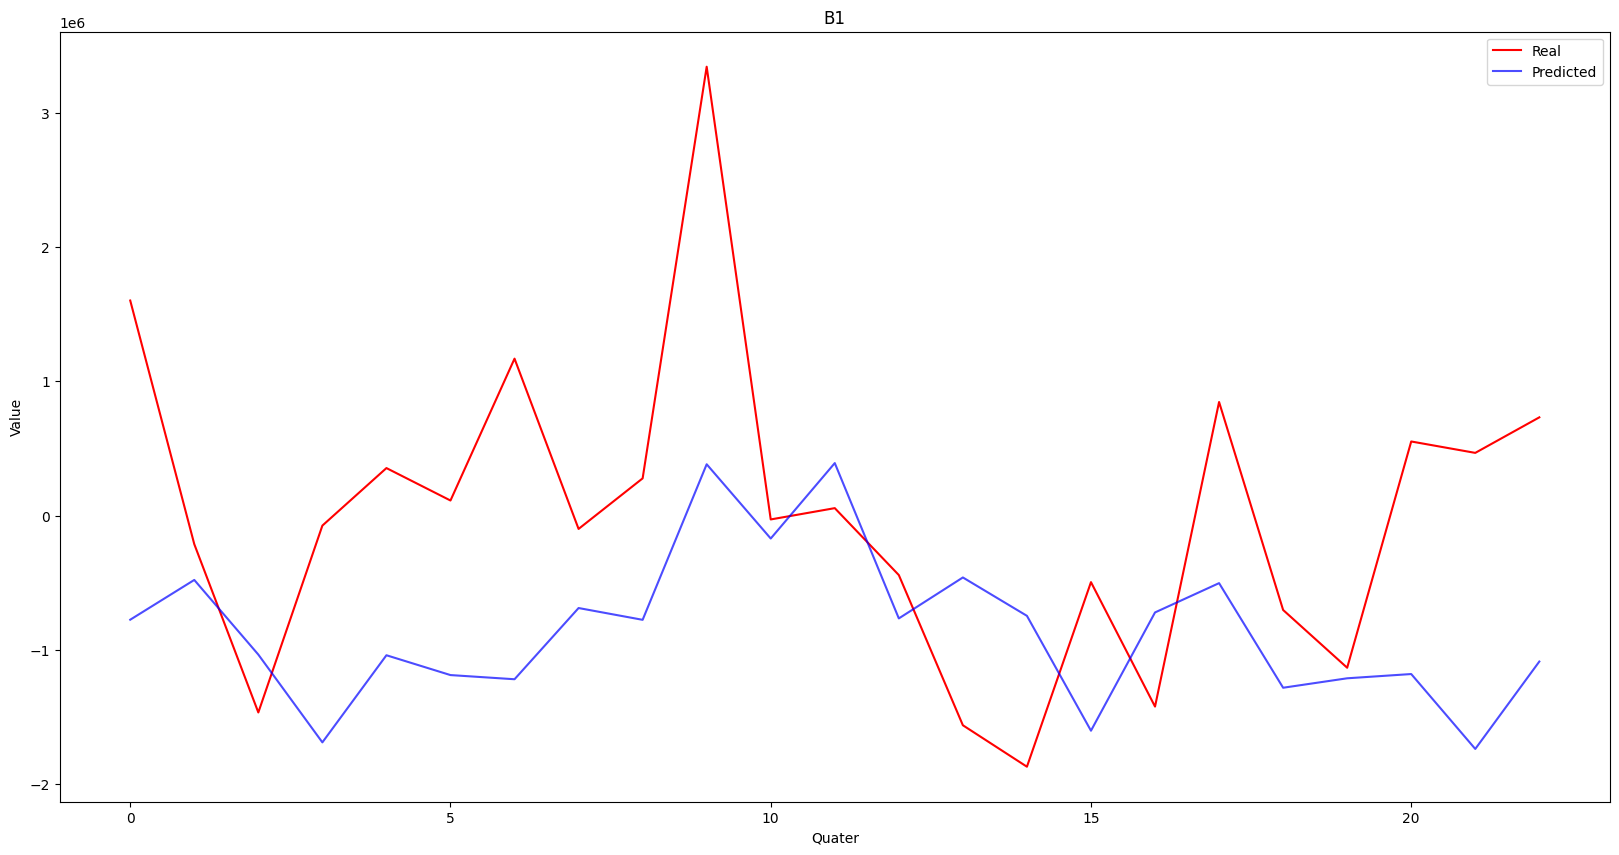

In [ ]:
# Ve bieu do gia that va gia du doan
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'red', label = 'Real')
plt.plot(predicted_stock_price, color = 'b', label = 'Predicted',alpha=.7)
plt.title('B1')
plt.xlabel('Quater')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
dataset_test = dataset_test['SL_Filter'][len(dataset_test)-8:len(dataset_test)].to_numpy()
dataset_test = np.array(dataset_test)

inputs = dataset_test
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
i = 0
A =[]
B =[]
while i<8:
    X_test = []
    no_of_sample = len(dataset_test)

    # Lay du lieu cuoi cung
    X_test.append(inputs[no_of_sample - 3:no_of_sample, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Du doan
    predicted_stock_price = regressor.predict(X_test)

    # chuyen gia tu khoang (0,1) thanh gia that
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    dataset_test = np.append(dataset_test, predicted_stock_price[0], axis=0)
    inputs = dataset_test
    inputs = inputs.reshape(-1, 1)
    inputs = sc.transform(inputs)
    A.append(predicted_stock_price[0][0])
    B.append(predicted_stock_price[0][0] + 2847015)
    print('Giá trị B1 trong ' + str(i+1) + ' tháng tiếp theo', predicted_stock_price[0][0]+2847015
)
    i = i +1

1/1 [==============================] - 0s 32ms/step
Giá trị B1 trong 1 tháng tiếp theo 2654395.59375
1/1 [==============================] - 0s 33ms/step
Giá trị B1 trong 2 tháng tiếp theo 2652623.015625
1/1 [==============================] - 0s 45ms/step
Giá trị B1 trong 3 tháng tiếp theo 2663921.453125
1/1 [==============================] - 0s 60ms/step
Giá trị B1 trong 4 tháng tiếp theo 2747761.75
1/1 [==============================] - 0s 37ms/step
Giá trị B1 trong 5 tháng tiếp theo 2747672.703125
1/1 [==============================] - 0s 32ms/step
Giá trị B1 trong 6 tháng tiếp theo 2744992.0859375
1/1 [==============================] - 0s 33ms/step
Giá trị B1 trong 7 tháng tiếp theo 2739810.953125
1/1 [==============================] - 0s 38ms/step
Giá trị B1 trong 8 tháng tiếp theo 2739890.984375


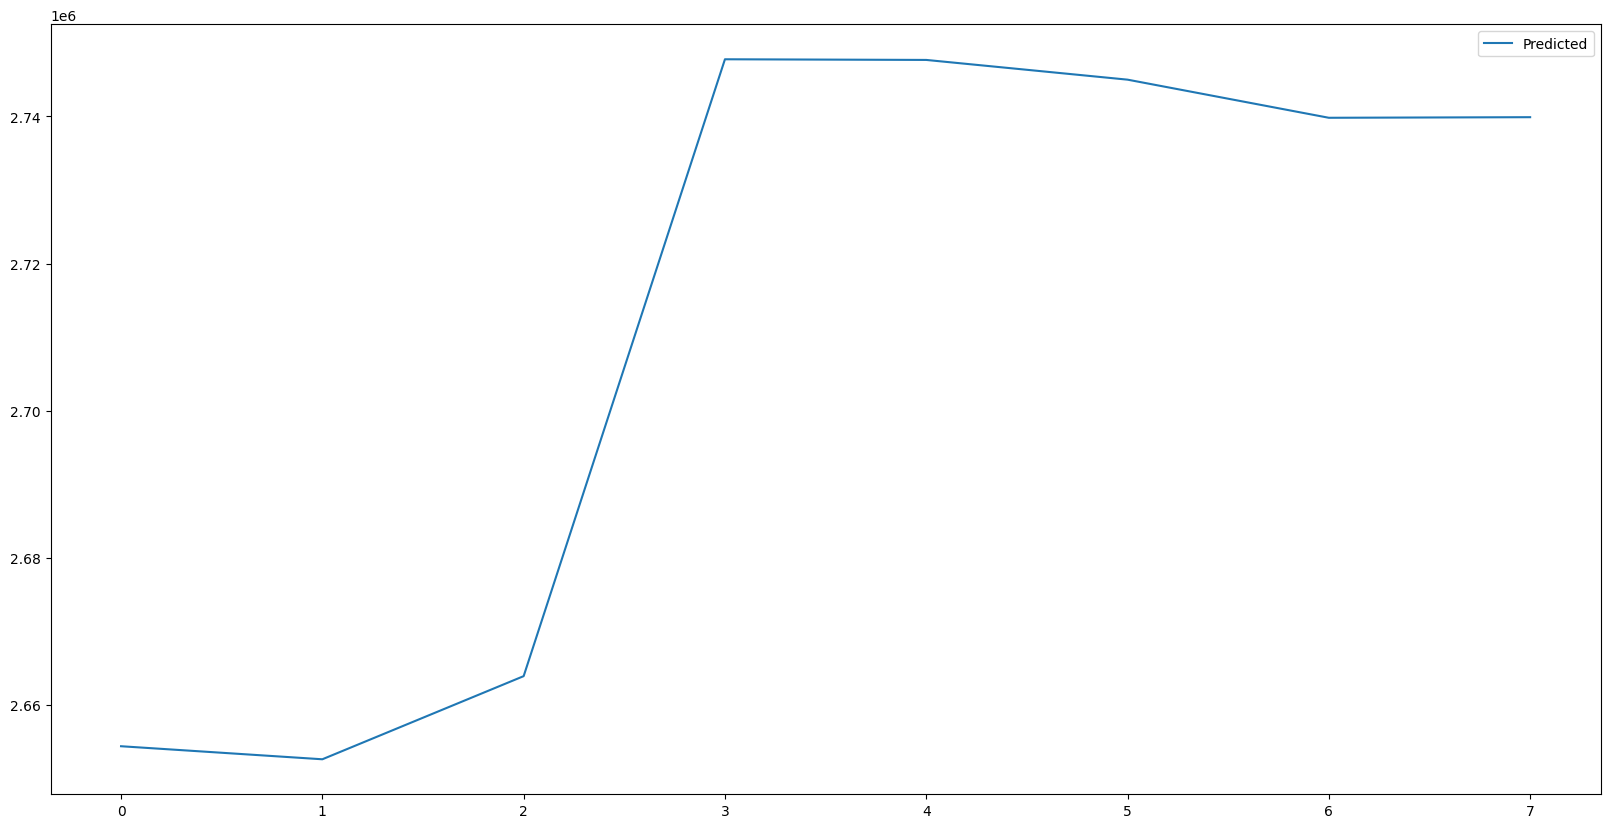

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(B,label = 'Predicted')
plt.legend()

In [ ]:
test_set = pd.read_csv('Data_Comp_Test.csv')
test_set = test_set['SL_Filter'].values

In [ ]:
test_set = test_set.reshape(-1,1)
test_set

array([[ 1602120.348  ],
       [ -212789.6522 ],
       [-1466501.652  ],
       [  -74505.65217],
       [  354037.3478 ],
       [  112367.3478 ],
       [ 1169236.348  ],
       [  -99185.65217],
       [  277344.3478 ],
       [ 3343879.348  ],
       [  -28622.65217],
       [   55564.34783],
       [ -443023.6522 ],
       [-1561868.652  ],
       [-1870729.652  ],
       [ -495644.6522 ],
       [-1422725.652  ],
       [  846249.3478 ],
       [ -703105.6522 ],
       [-1133355.652  ],
       [  552141.3478 ],
       [  467191.3478 ],
       [  731927.3478 ]])

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = sc.fit_transform(test_set)
test_set_scaled

array([[0.66598474],
       [0.31794138],
       [0.07751837],
       [0.34445996],
       [0.42664119],
       [0.38029639],
       [0.58297103],
       [0.3397271 ],
       [0.41193386],
       [1.        ],
       [0.35325889],
       [0.36940334],
       [0.27378966],
       [0.05922994],
       [0.        ],
       [0.26369858],
       [0.08591325],
       [0.52103216],
       [0.22391401],
       [0.14140542],
       [0.46463138],
       [0.44834061],
       [0.49910875]])

In [ ]:
X_test = []
y_test = []
no_of_sample = len(test_set)
for i in range(8, no_of_sample):
    X_test.append(test_set_scaled[i-8:i, 0])
    y_test.append(test_set_scaled[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test

array([[[0.66598474],
        [0.31794138],
        [0.07751837],
        [0.34445996],
        [0.42664119],
        [0.38029639],
        [0.58297103],
        [0.3397271 ]],

       [[0.31794138],
        [0.07751837],
        [0.34445996],
        [0.42664119],
        [0.38029639],
        [0.58297103],
        [0.3397271 ],
        [0.41193386]],

       [[0.07751837],
        [0.34445996],
        [0.42664119],
        [0.38029639],
        [0.58297103],
        [0.3397271 ],
        [0.41193386],
        [1.        ]],

       [[0.34445996],
        [0.42664119],
        [0.38029639],
        [0.58297103],
        [0.3397271 ],
        [0.41193386],
        [1.        ],
        [0.35325889]],

       [[0.42664119],
        [0.38029639],
        [0.58297103],
        [0.3397271 ],
        [0.41193386],
        [1.        ],
        [0.35325889],
        [0.36940334]],

       [[0.38029639],
        [0.58297103],
        [0.3397271 ],
        [0.41193386],
        [1.        ],


In [ ]:
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)
y_test = sc.inverse_transform(y_test.reshape(-1,1))
y_test

1/1 [==============================] - 0s 25ms/step


array([[  277344.3478 ],
       [ 3343879.348  ],
       [  -28622.65217],
       [   55564.34783],
       [ -443023.6522 ],
       [-1561868.652  ],
       [-1870729.652  ],
       [ -495644.6522 ],
       [-1422725.652  ],
       [  846249.3478 ],
       [ -703105.6522 ],
       [-1133355.652  ],
       [  552141.3478 ],
       [  467191.3478 ],
       [  731927.3478 ]])

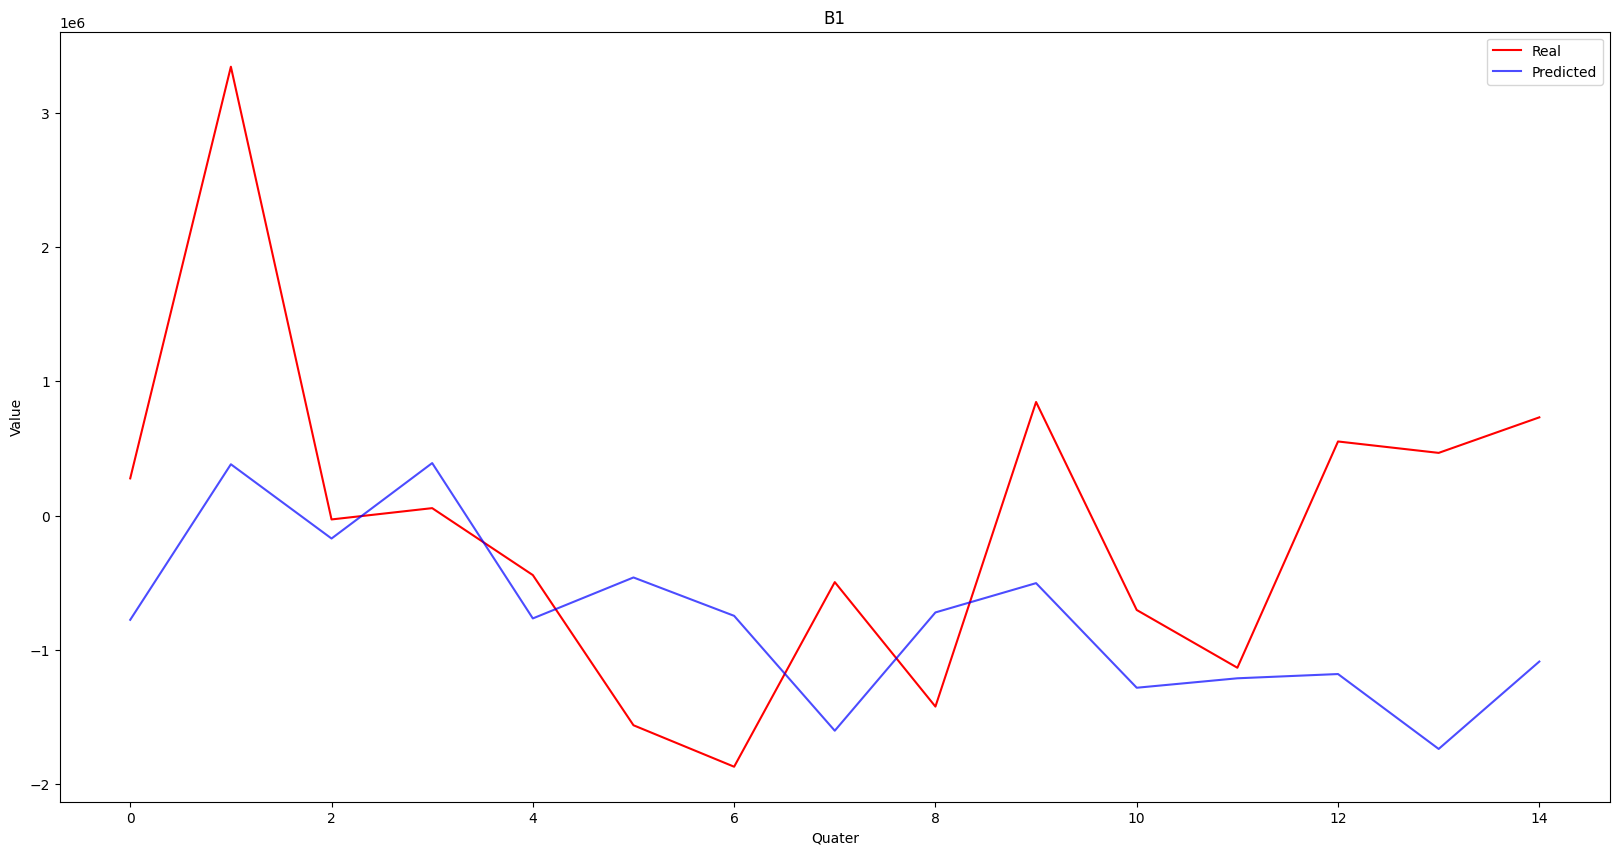

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(predicted, color = 'b', label = 'Predicted',alpha=.7)
plt.title('B1')
plt.xlabel('Quater')
plt.ylabel('Value')
plt.legend()
plt.show()